# Exploratory Data Analysis (Using the Twitter_Influencers/Tweets.JSON files) 

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
import numpy as np
from nltk.corpus import stopwords                   #Stopwords corpus
from nltk.stem import PorterStemmer                 # Stemmer
from textblob import TextBlob
from sklearn.feature_extraction.text import CountVectorizer          #For Bag of words
from sklearn.feature_extraction.text import TfidfVectorizer          #For TF-IDF
warnings.filterwarnings('ignore')

pd.set_option('mode.chained_assignment', None)

# Comment this if the data visualisations doesn't work on your side
%matplotlib inline

plt.style.use('bmh')

# Create URL to JSON file (alternatively this can be a filepath)
# Load the first sheet of the JSON file into a data frame
df = pd.read_json(r'https://raw.githubusercontent.com/sewen770/nlp_challege/master/twitter_influencers.json', orient='columns')
# View the first ten rows
df.head(10)



,followers_count,following_count,likes_count,max_retweet_value,social_referrals,statuses_count,twitter_handle,twitter_id
0,41830534,1108,1437,97,[{'article_id': '336914f0-d1d6-11e6-ab89-c1194...,238672,CNN,759251
1,168535,1,273,68,[{'article_id': '0648ed40-d16a-11e6-ab89-c1194...,133104,drudgeheadlines,1932657667
2,15966353,410,517,58,[{'article_id': '97c8d860-d1ca-11e6-ab89-c1194...,316491,TIME,14293310
3,329225,1142,8901,31,[{'article_id': 'efc970d0-d1b9-11e6-ab89-c1194...,198323,globalnews,116502194
4,6713169,440,287,28,[{'article_id': '582c0590-d1b3-11e6-ab89-c1194...,211618,CBSNews,15012486
5,4969179,907,1149,27,[{'article_id': '2c0aa320-d35e-11e6-b0a3-0310e...,251598,TMZ,16331010
6,37966,38871,8687,11,[{'article_id': '757aab00-d16e-11e6-ab89-c1194...,246720,Serpentine202,16892534
7,739813,773,1375,11,[{'article_id': '77343b10-d1e0-11e6-ab89-c1194...,177313,KTLA,10252962
8,16294,610,22,7,[{'article_id': '0648ed40-d16a-11e6-ab89-c1194...,60939,HenryMakow,477864155
9,323365,2151,3875,7,[{'article_id': 'aa72a800-d428-11e6-ab89-c1194...,56194,thepointsguy,34176543


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16655 entries, 0 to 16654
Data columns (total 8 columns):
followers_count      16655 non-null int64
following_count      16655 non-null int64
likes_count          16655 non-null int64
max_retweet_value    16655 non-null int64
social_referrals     16655 non-null object
statuses_count       16655 non-null int64
twitter_handle       16655 non-null object
twitter_id           16655 non-null int64
dtypes: int64(6), object(2)
memory usage: 1.0+ MB


This looks like a very clean dataset, with very little NA values. There are 5 numeric variables and 3 categorical variables. 

In [7]:
#Some basic pre-processing:
# df.count() does not include NaN values

df2 = df[[column for column in df if df[column].count() / len(df) >= 0.3]]
print("List of dropped columns:", end=" ")
for c in df.columns:
    if c not in df2.columns:
        print(c, end=", ")
print('\n')
df = df2


List of dropped columns: 



# Numerical Data Distribution

count    1.665500e+04
mean     9.318356e+05
std      3.649914e+06
min      0.000000e+00
25%      7.496000e+03
50%      6.315500e+04
75%      3.157360e+05
max      7.755958e+07
Name: followers_count, dtype: float64


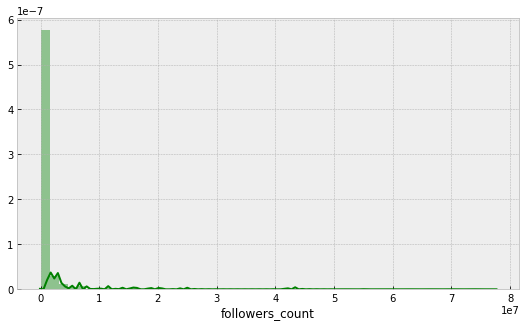

In [8]:
print(df['followers_count'].describe())
plt.figure(figsize=(9, 5))
sns.distplot(df['followers_count'], color='g', bins=50, hist_kws={'alpha': 0.4});


It looks like this data is skewed by individuals with very high follower counts. 
Let's try excluding them by creating a new dataframe with individuals that are NO greater than the 75th percentile, and by creating a log-transformation of the values. 

In [20]:
a= df[df['followers_count']< 3.157360e+05]


For this part lets look at the distribution of all of the features by ploting them. To do so lets first list all the types of our data from our dataset and take only the numerical ones, and plot them using a histogram matrix. 

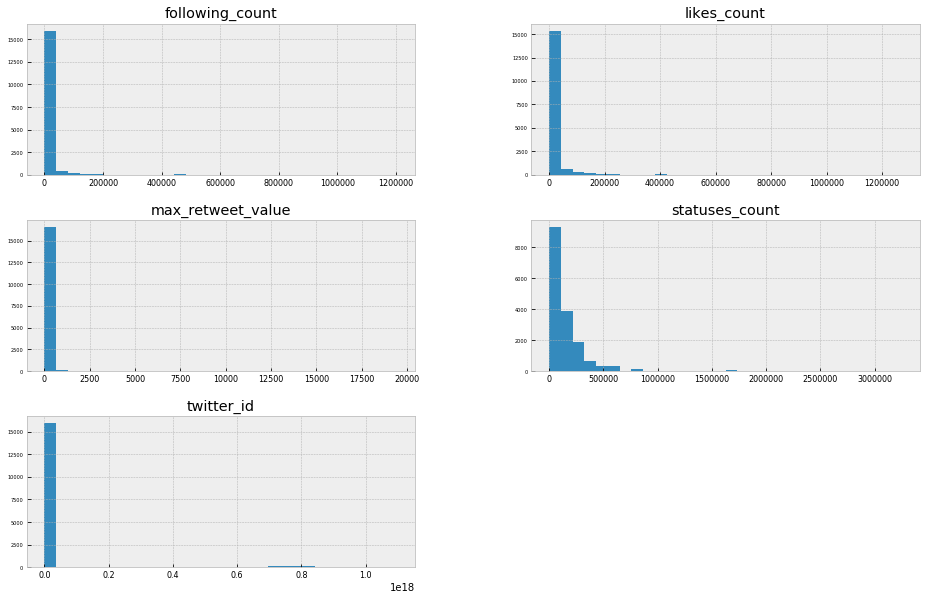

In [15]:
list(set(df.dtypes.tolist()))
df_num = df.select_dtypes(include = ['float64', 'int64'])
df_num.head()
df_num.hist(figsize=(16, 10), bins=30, xlabelsize=8, ylabelsize=5); # ; avoid having the matplotlib verbose informations


All of this data appears incredibly skewed. In the case of 'twitter_id', it acts more like a categorical variable. 
Let's inspect twitter id just to be very sure. 

In [22]:
df['twitter_id'].head()


0        759251
1    1932657667
2      14293310
3     116502194
4      15012486
Name: twitter_id, dtype: int64

This tells me this just shows the 'unique' twitter ids for each correlation, so we can assume to drop this/consider this 
as the **outcome** variable we are going to care about. 

# Log Transformation of Values

In [ ]:
def normalize(column):
    upper = column.max()
    lower = column.min()
    y = (column - lower)/(upper-lower)
    return y


# Correlation Matrix

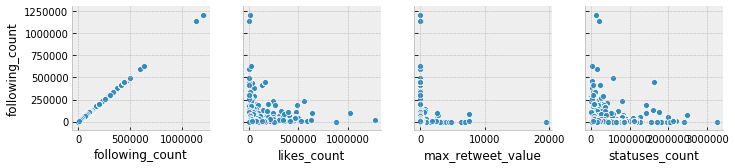

In [23]:
for i in range(0, len(df_num.columns), 5):
    sns.pairplot(data=df_num,
                x_vars=df_num.columns[i:i+5],
                y_vars=['following_count'])


# Correlation Heatmap

In [24]:
plt.figure(figsize=(12, 10))

sns.heatmap(corr[(corr >= 0.0001) | (corr <= -0.0001)], 
            cmap='viridis', vmax=1.0, vmin=-1.0, linewidths=0.1,
            annot=True, annot_kws={"size": 8}, square=True);


NameError: name 'corr' is not defined

<Figure size 864x720 with 0 Axes>

# Cleaning the 'social_referrals' column

There are **five** key pieces of information that is relevant to the analysis for the problem statement. 

1. 'favourite_count'
2. 'rt_count'
3. 'created_at'
4. 'description'
5. 'article_url'

We are going to use **regex pattern matching** to extract these key pieces of information. 

In [26]:
df['social_referrals'] = df['social_referrals'].astype(str)
df['social_referrals'] = df['social_referrals'].str.replace(r"\s*\([^()]*\)","").str.strip()
df['social_referrals'] = df['social_referrals'].str.replace(',', "")
df['social_referrals'] = df['social_referrals'].str.replace('{|}|[|]', "")

# new data frame with split value columns 
new = df["social_referrals"].str.split(" ", n = 11, expand = True) 
df2 = pd.DataFrame()
df2['article_id'] = new[1]
df2['twitter_url'] = new[3]
df2['favourite_count'] = new[5]
df2['rt_count'] = new[7]
df2['created_at'] = new[9]
df2['description'] = new[11]
new2 = df2['description'].str.split(".", n=1, expand = True)
df2['article_url'] = new2[1]
df2['description'] = df2['description'].str.replace("[^a-zA-Z#]", " ")
df2['description'] = df2['description'].apply(lambda x: ' '.join([w for w in x.split() if len(w)>3]))

df2.head()


,article_id,twitter_url,favourite_count,rt_count,created_at,description,article_url
0,'336914f0-d1d6-11e6-ab89-c11942898bd6','https://twitter.com/any/status/81635848027781...,110,97,1483470003000,United Airlines investigating baggage handler ...,' 'article_url': 'http://www.cnn.com/2017/01/0...
1,'0648ed40-d16a-11e6-ab89-c11942898bd6','https://twitter.com/any/status/81630153775238...,63,68,1483456427000,been arrested after allegedly launched into ra...,' 'article_url': 'http://www.news.com.au/trave...
2,'97c8d860-d1ca-11e6-ab89-c11942898bd6','https://twitter.com/any/status/81630941735646...,78,58,1483458306000,flight reached altitude feet article http fort...,' 'article_url': 'http://fortune.com/2017/01/0...
3,'efc970d0-d1b9-11e6-ab89-c11942898bd6','https://twitter.com/any/status/81630941011709...,9,31,1483458304000,United Airlines says investigating after vendo...,""" 'article_url': 'http://globalnews.ca/news/31..."
4,'582c0590-d1b3-11e6-ab89-c11942898bd6','https://twitter.com/any/status/81626696001515...,21,28,1483448183000,still clear exactly what happened cause baggag...,"C."" 'article_url': 'http://www.cbsnews.com/new..."


# Tokenization & Stemming (Natural Language Processing) 

We're going to look at the **description** column more deeply to conduct our sentiment analysis. The first step we are going to take on is tokenization. Tokens are individual terms or words, and tokenization is the process of splitting a string of text into tokens.


In [27]:
import nltk 
from nltk.corpus import stopwords
stop = stopwords.words('english')

### Remove special characters 
df2['description']= df2['description'].str.replace('[^\w\s]','')
df2['description'] = df2['description'].apply(lambda x: " ".join(x.lower() for x in x.split()))
### Remove stop words 
df2['description']  = df2['description'].apply(lambda x: " ".join(x for x in x.split() if x not in stop))

## Remove 10 most frequent words
freq = pd.Series(' '.join(df2['description']).split()).value_counts()[:10]
freq = list(freq.index)
df2['description'] = df2['description'].apply(lambda x: " ".join(x for x in x.split() if x not in freq))
df2['description'].head()

## Remove 10th percentile least frequent words 
freq = pd.Series(' '.join(df2['description']).split()).value_counts()[-10:]
freq = list(freq.index)
df2['description'] = df2['description'].apply(lambda x: " ".join(x for x in x.split() if x not in freq))
df2['description'].head()


0    investigating baggage handler became trapped c...
1    arrested allegedly launched racist tirade verb...
2    reached altitude feet fortune employee cargo s...
3    says investigating vendor employee found unhar...
4    still clear exactly happened cause baggage han...
Name: description, dtype: object

**Stemming** is a rule-based process of stripping the suffixes (“ing”, “ly”, “es”, “s” etc) from a word. For example, For example – “play”, “player”, “played”, “plays” and “playing” are the different variations of the word – “play”.

# Story Generation and Visualization 

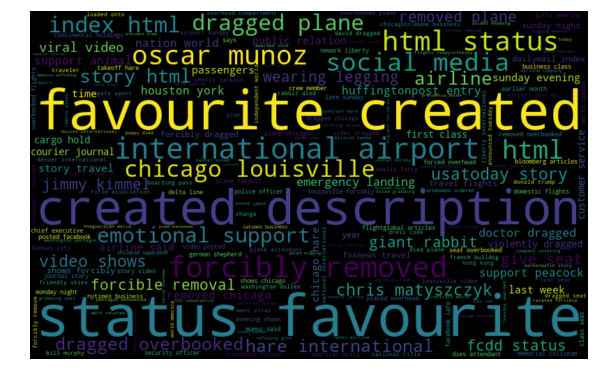

In [28]:
all_words = ' '.join([text for text in df2['description']])
from wordcloud import WordCloud
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(all_words)

plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()


In [29]:
df2['sentiment'] = df2['description'].apply(lambda x: TextBlob(x).sentiment[0] )
df2[['description','sentiment']].head()


,description,sentiment
0,investigating baggage handler became trapped c...,-0.200000
1,arrested allegedly launched racist tirade verb...,-0.100000
2,reached altitude feet fortune employee cargo s...,0.000000
3,says investigating vendor employee found unhar...,-0.066667
4,still clear exactly happened cause baggage han...,0.050000
